In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
import scipy.io as sio

In [2]:

##In case you were wondering how I prepared the data
"""
#load data

#data source: https://finance.yahoo.com/quote/%5EGSPC/history/

weeks_after_start = []
dewtemp = []

f = open('localweather.csv')
header = f.readline()
idx = header.split(',').index('HourlyDewPointTemperatureC')
startdate = None
line = f.readline()

while len(line) > 0:
    splitline = line.split(',')
    
    #load day
    dt = splitline[5].split(' ')
    d = dt[0].split('-')
    t = dt[1].split(':')
    
    d = int(d[0]),int(d[1]),int(d[2])    
    t = int(t[0]), int(t[1])
    d = datetime.datetime(year=d[0],month=d[1],day=d[2], hour=t[0],minute=d[1])
    if startdate is None:
        startdate = copy.deepcopy(d)
    
    if  len(splitline[idx].strip('')) == 0: 
        line = f.readline()
        continue
    weeks_after_start.append((d - startdate).seconds/( 24 * 60 * 60*7 +0.) + (d-startdate).days/7.)
    
    dewtemp.append(float(splitline[idx]))

    line = f.readline()

weeks_after_start, dewtemp = np.array(weeks_after_start), np.array(dewtemp)
plt.plot(weeks_after_start, dewtemp)

plt.xlabel('Weeks after first reading')
plt.ylabel('Dew point temp (C)')
plt.tight_layout()
plt.savefig('polyfit_hw1_0.png')
plt.savefig('polyfit_hw1_0.eps')
N = len(weeks_after_start)

sio.savemat('weatherDewTmp.mat',{'weeks':weeks_after_start,'dew':dewtemp})
print N
"""



"\n#load data\n\n#data source: https://finance.yahoo.com/quote/%5EGSPC/history/\n\nweeks_after_start = []\ndewtemp = []\n\nf = open('localweather.csv')\nheader = f.readline()\nidx = header.split(',').index('HourlyDewPointTemperatureC')\nstartdate = None\nline = f.readline()\n\nwhile len(line) > 0:\n    splitline = line.split(',')\n    \n    #load day\n    dt = splitline[5].split(' ')\n    d = dt[0].split('-')\n    t = dt[1].split(':')\n    \n    d = int(d[0]),int(d[1]),int(d[2])    \n    t = int(t[0]), int(t[1])\n    d = datetime.datetime(year=d[0],month=d[1],day=d[2], hour=t[0],minute=d[1])\n    if startdate is None:\n        startdate = copy.deepcopy(d)\n    \n    if  len(splitline[idx].strip('')) == 0: \n        line = f.readline()\n        continue\n    weeks_after_start.append((d - startdate).seconds/( 24 * 60 * 60*7 +0.) + (d-startdate).days/7.)\n    \n    dewtemp.append(float(splitline[idx]))\n\n    line = f.readline()\n\nweeks_after_start, dewtemp = np.array(weeks_after_start),

742


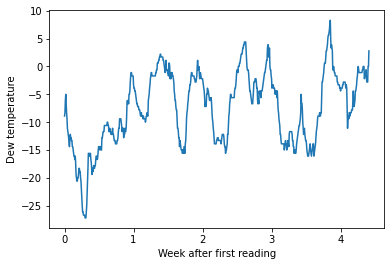

In [3]:
#This cell forms the mat file you were already given
data = sio.loadmat('weatherDewTmp.mat')
weeks_after_start = data['weeks'][0]

dewtemp = data['dew'][0]
#print(len(dewtemp))
N = len(dewtemp)
plt.plot(weeks_after_start, dewtemp)
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
print(N)

# Linear Regression


Normal Equation of the problem:

$X^TX\theta = X^TY$

In [4]:
def packX(z,poly_order):
    X = np.zeros((len(z),poly_order+1))
    for p in range(poly_order+1):
        X[:,p] = np.array(range(len(z)))**p
    return X

def solveLinearSystem(X,y):
    #print(np.dot(X.T,X),np.dot(X.T,y))
    theta = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y))
    return theta

# TEST SCRIPT. DO NOT MODIFY!
X = packX(range(100),3)
y = np.sqrt(np.array(range(100)))
theta = solveLinearSystem(X,y)
print('Check number: ', np.sum(theta))


Check number:  1.341270179610469


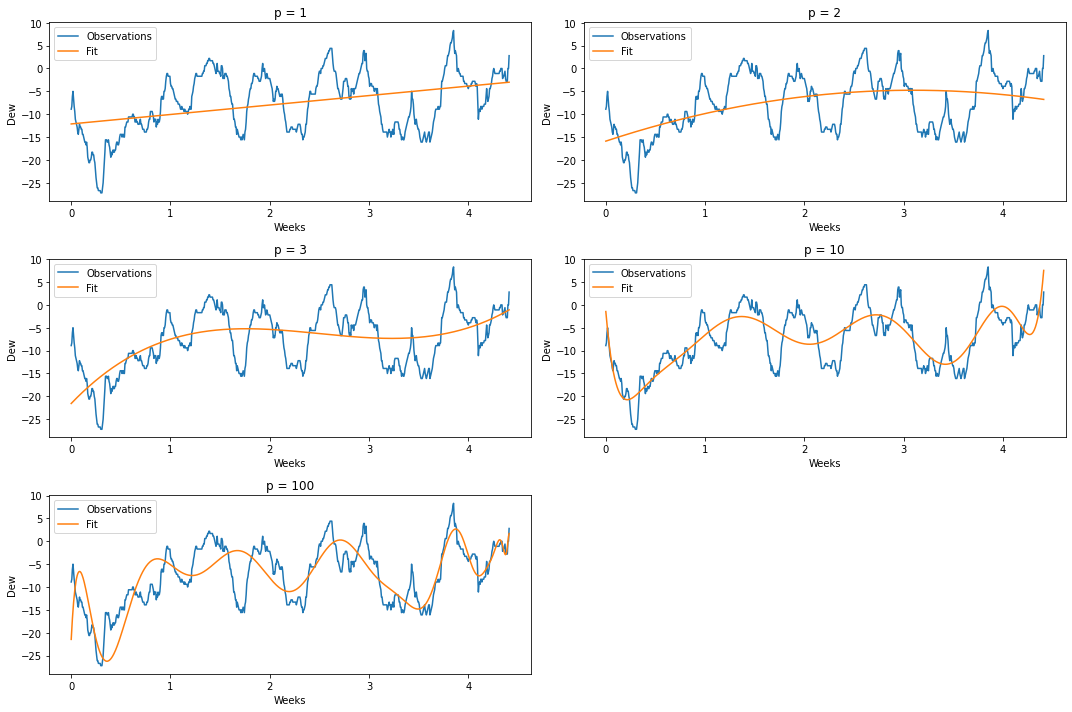

In [5]:
counter = 0
plt.rcParams["figure.figsize"] = (15,10)

for poly_order in [1,2,3,10,100]:
    
    X = np.zeros((N, poly_order+1))
    for p in range(poly_order+1):
        X[:,p] = np.array(weeks_after_start)**p
    y = np.array(dewtemp)
    theta = solveLinearSystem(X,y)
    ypred = np.dot(X, theta)
    
    counter += 1
    plt.subplot(3,2,counter)
    
    plt.plot(weeks_after_start, y)
    plt.plot(weeks_after_start, ypred) 
    
    plt.title('p = %d' % poly_order)
    
    plt.xlabel('Weeks')
    plt.ylabel('Dew')
    plt.legend(['Observations','Fit'])
    
plt.tight_layout()
plt.savefig('predictions.png')

"Goodness of fit"

   From the above graphs, we can see that for p=1,2 model is underfitted. While P=3,10 look more balanced in fitting and should be better in performace on new data points. P=100 looks overfitted. P=100 model will not perform as well with new data because it is built for the given data so specifically that it may not fit new data.   

# Ridge Regression

Normal Equation of the problem:

$(X^TX + \rho I)\theta = X^TY$

In [6]:
def solveRidgeRegressionSystem(X,y,rho):
    theta = np.linalg.solve(np.dot(X.T, X) + rho * np.eye(X.shape[1]), np.dot(X.T, y))
    return theta

# TEST SCRIPT. DO NOT MODIFY!
X = packX(range(100),3)
y = np.sqrt(np.array(range(100)))
theta = solveRidgeRegressionSystem(X,y,1)
print('Check number: ', np.sum(theta))


Check number:  1.2061712965225844


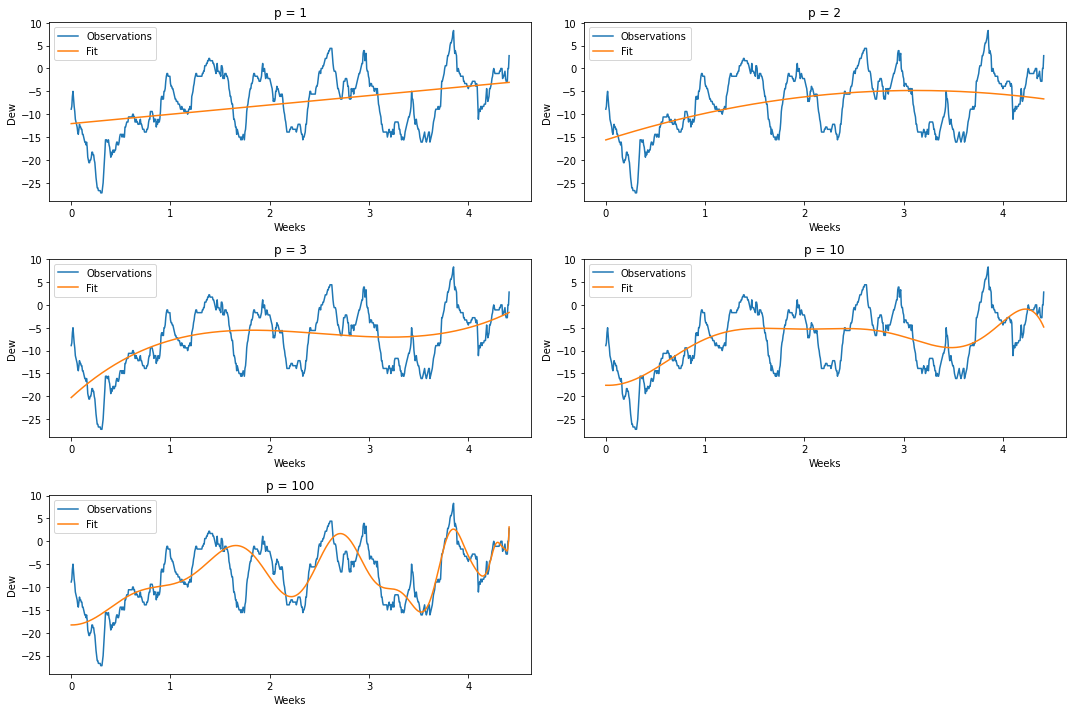

In [7]:
rho = 1.0
counter = 0
plt.rcParams["figure.figsize"] = (15,10)

for poly_order in [1,2,3,10,100]:
    X = np.zeros((N,poly_order+1))
    for p in range(poly_order+1):
        X[:,p] = np.array(weeks_after_start)**p
    y = np.array(dewtemp)
    theta = solveRidgeRegressionSystem(X, y, rho)
    ypred = np.dot(X, theta)
    
    counter += 1
    plt.subplot(3,2,counter)
    
    plt.plot(weeks_after_start, y)
    plt.plot(weeks_after_start, ypred) 
    
    plt.title('p = %d' % poly_order)
    
    plt.xlabel('Weeks')
    plt.ylabel('Dew')
    plt.legend(['Observations','Fit'])
    
plt.tight_layout()
plt.savefig('predictions_ridge.png')

"Goodness and Stability of fit"

From above plots, we can see that p=1,2 are underfitted and does not capture the complexity of the model. P=3,10 look balanced and most stable for predictions on new data points. P=100 looks overfitted and is not very stable.   

"Linear Vs Ridge Plots"

By adding the extra penalty term in ridge plots we can see that for higher values of P i.e 10,100 - fit has become more stable and less overfitted compared to linear ones. 

# Please scroll down for remaining questions after blank pages 

# Conditioning

![alt text](ConditionEQ.jpg "Title")

In [8]:
def calcConditionNumber(X, rho):
    
    Q = np.dot(X.T, X) + rho * np.eye(X.shape[1])
    w = np.linalg.eigvals(Q)
    condition_number = np.max(w)/ np.min(w)

    return condition_number

In [58]:
rhos = [0, N, 10 * N, 100 * N]

for p in [1,2,5,10]:
    X = np.zeros((N,p+1))
    for pw in range(p+1):
        X[:,pw] = np.array(weeks_after_start)**pw
    for rho in rhos:
        print ("P:",p, "Rho:", rho, "Condition#:", '%.2f'% calcConditionNumber(X, rho))

| p | ρ = 0 |  ρ = m | ρ = 10m |  ρ = 100m |
| --- | --- | --- | --- | --- |
| 1 | 32.47 | 6.75 | 1.69 | 1.07 |
| 2 | 1476.39 | 79.11 | 9.20 | 1.82 |
| 5 | 7.308e8 | 271693.25 | 27179.32 | 2718.92 |
| 10 | 7.099e18 | 3.97e11 | 3.97e10 | 3.97e9 |


From above table, we can see that, for higher values of rho, we have much smaller condition number compared to rho =0. Also with the values of P, condition number seems to blow up exponentially as move towards P>5. P values between <5 and rho values closer to 0-0.001m should be good enough. 

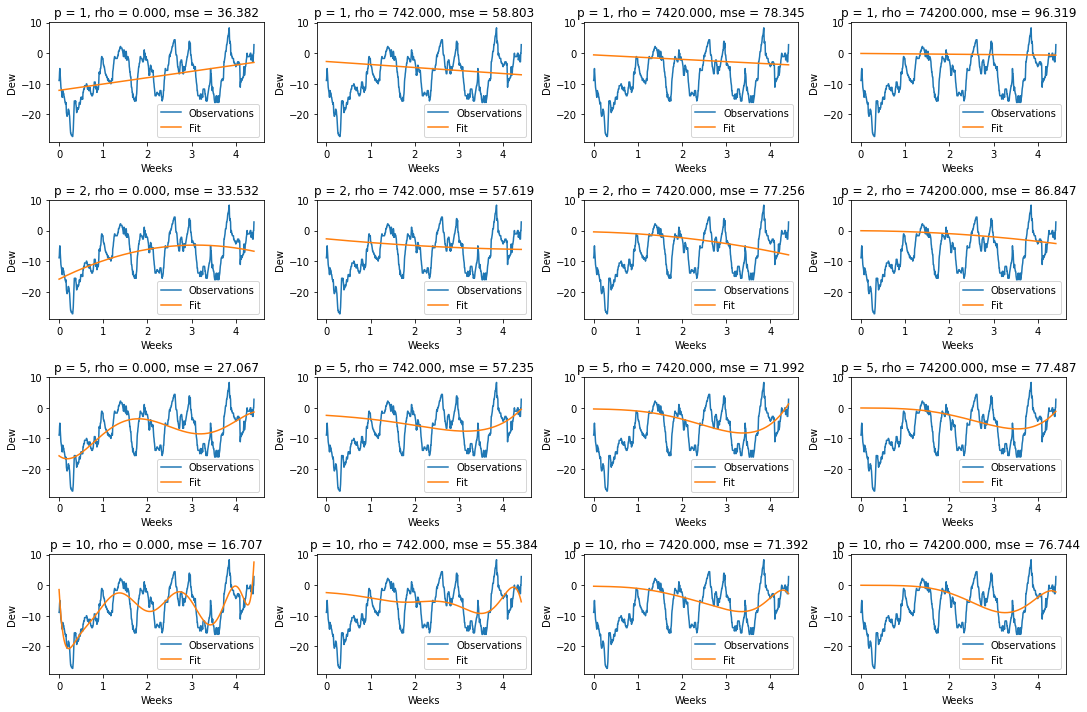

In [33]:
rhos = [0, N, 10 * N, 100 * N]
counter = 0
plt.rcParams["figure.figsize"] = (15,10)

for poly_order in [1,2,5,10]:
    X = np.zeros((N,poly_order+1))
    for p in range(poly_order+1):
        X[:,p] = np.array(weeks_after_start)**p
    y = np.array(dewtemp)
    for rho in rhos:
        theta = solveRidgeRegressionSystem(X, y, rho)
        ypred = np.dot(X, theta)
        mse = np.sum((ypred-y)**2)/N
        counter += 1
        plt.subplot(4,4,counter)

        plt.plot(weeks_after_start, y)
        plt.plot(weeks_after_start, ypred) 

        plt.title('p = %d, rho = %.3f, mse = %.3f' % (poly_order, rho, mse))

        plt.xlabel('Weeks')
        plt.ylabel('Dew')
        plt.legend(['Observations','Fit'])
    
plt.tight_layout()
plt.savefig('predictions_ridge_conditioning.png')

# MSE
| p | ρ = 0 |  ρ = m | ρ = 10m |  ρ = 100m |
| --- | --- | --- | --- | --- |
| 1 | 36.382 | 58.803 | 78.345 | 96.319 |
| 2 | 33.532 | 57.619 | 77.256 | 86.847 |
| 5 | 27.067 | 57.235 | 71.992 | 77.487 |
| 10 | 16.707 | 55.384 | 71.392 | 76.744 |

From the above table, we can observe that with higher values of rho, mean sqaured error seems to be much worse. MSE is reasonable for rho closer to 0. While higher rho value improves conditioning, it performs very poorly. Although we have least error rate for p=10, rho=0, it is a scenario of overfitted model and will not perform well on new samples. "Sweet Spot" should be p values between 2-5 and rho closer to 0-0.001m.  

# Forecasting

In [50]:
future_points = [weeks_after_start[-1] + (weeks_after_start[1] - weeks_after_start[0]), ]

for i in range(1, 258):
    future_points.append(future_points[i-1] + (weeks_after_start[1] - weeks_after_start[0]))
X_fut = np.array(weeks_after_start.tolist() + future_points).reshape(-1,)

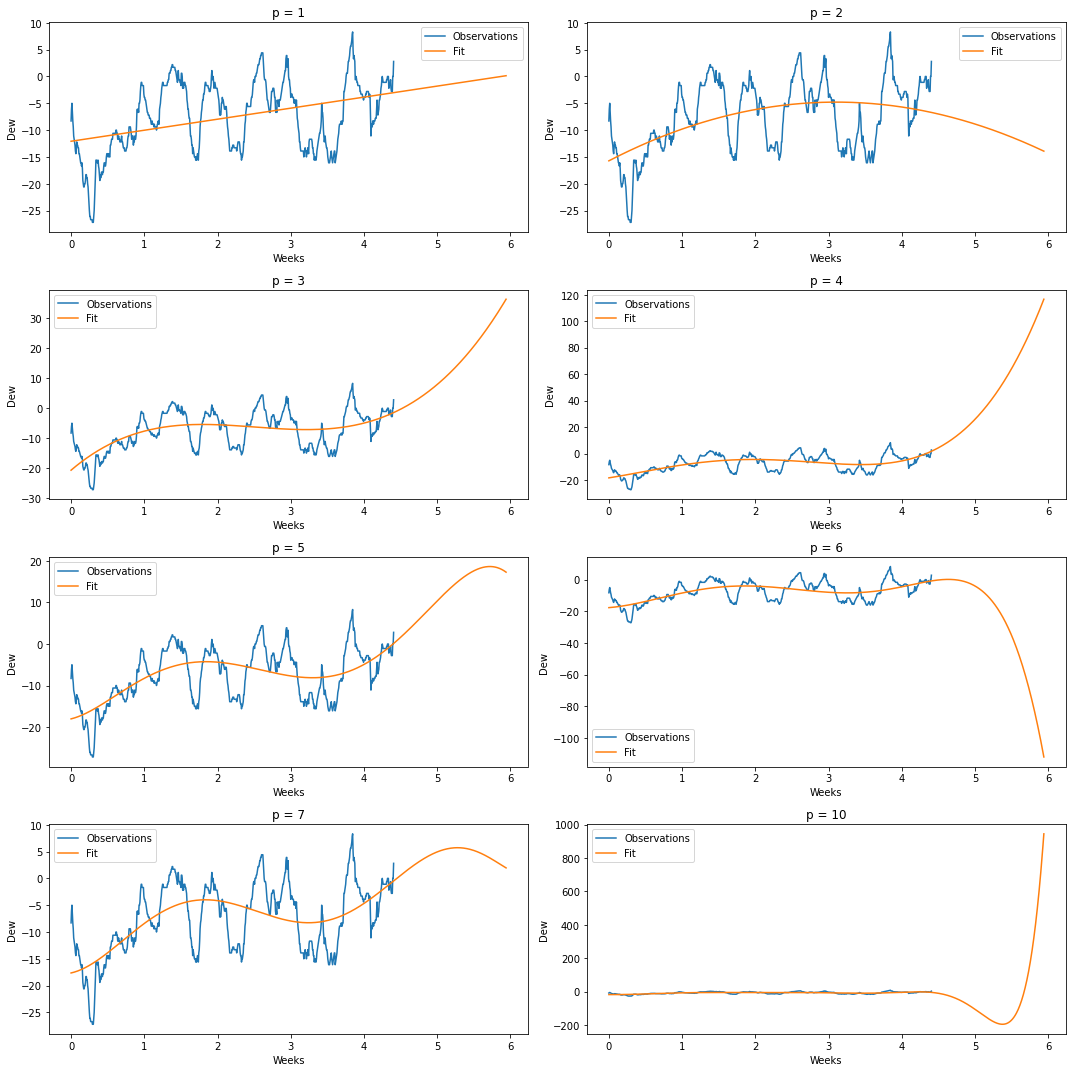

In [59]:
rho = 0.742
counter = 0
plt.rcParams["figure.figsize"] = (15,15)

for poly_order in [1,2,3,4,5,6,7,10]:
    X = np.zeros((len(X_fut[:-1]),poly_order+1))
    for p in range(poly_order+1):
        X[:,p] = np.array(X_fut[:-1])**p
    y = np.array(dewtemp)[1:]
    theta = solveRidgeRegressionSystem(X[:len(y)], y, rho)
    ypred = np.dot(X, theta)
    #print(ypred.shape,X_train_test[:-1].shape)
    counter += 1
    plt.subplot(4,2,counter)
    
    plt.plot(X_fut[:-1][:len(y)], y)
    plt.plot(X_fut[:-1][:len(ypred)], ypred) 
    
    plt.title('p = %d' % poly_order)
    
    plt.xlabel('Weeks')
    plt.ylabel('Dew')
    plt.legend(['Observations','Fit'])
    
plt.tight_layout()
plt.savefig('predictions_ridge_forecast_p.png')

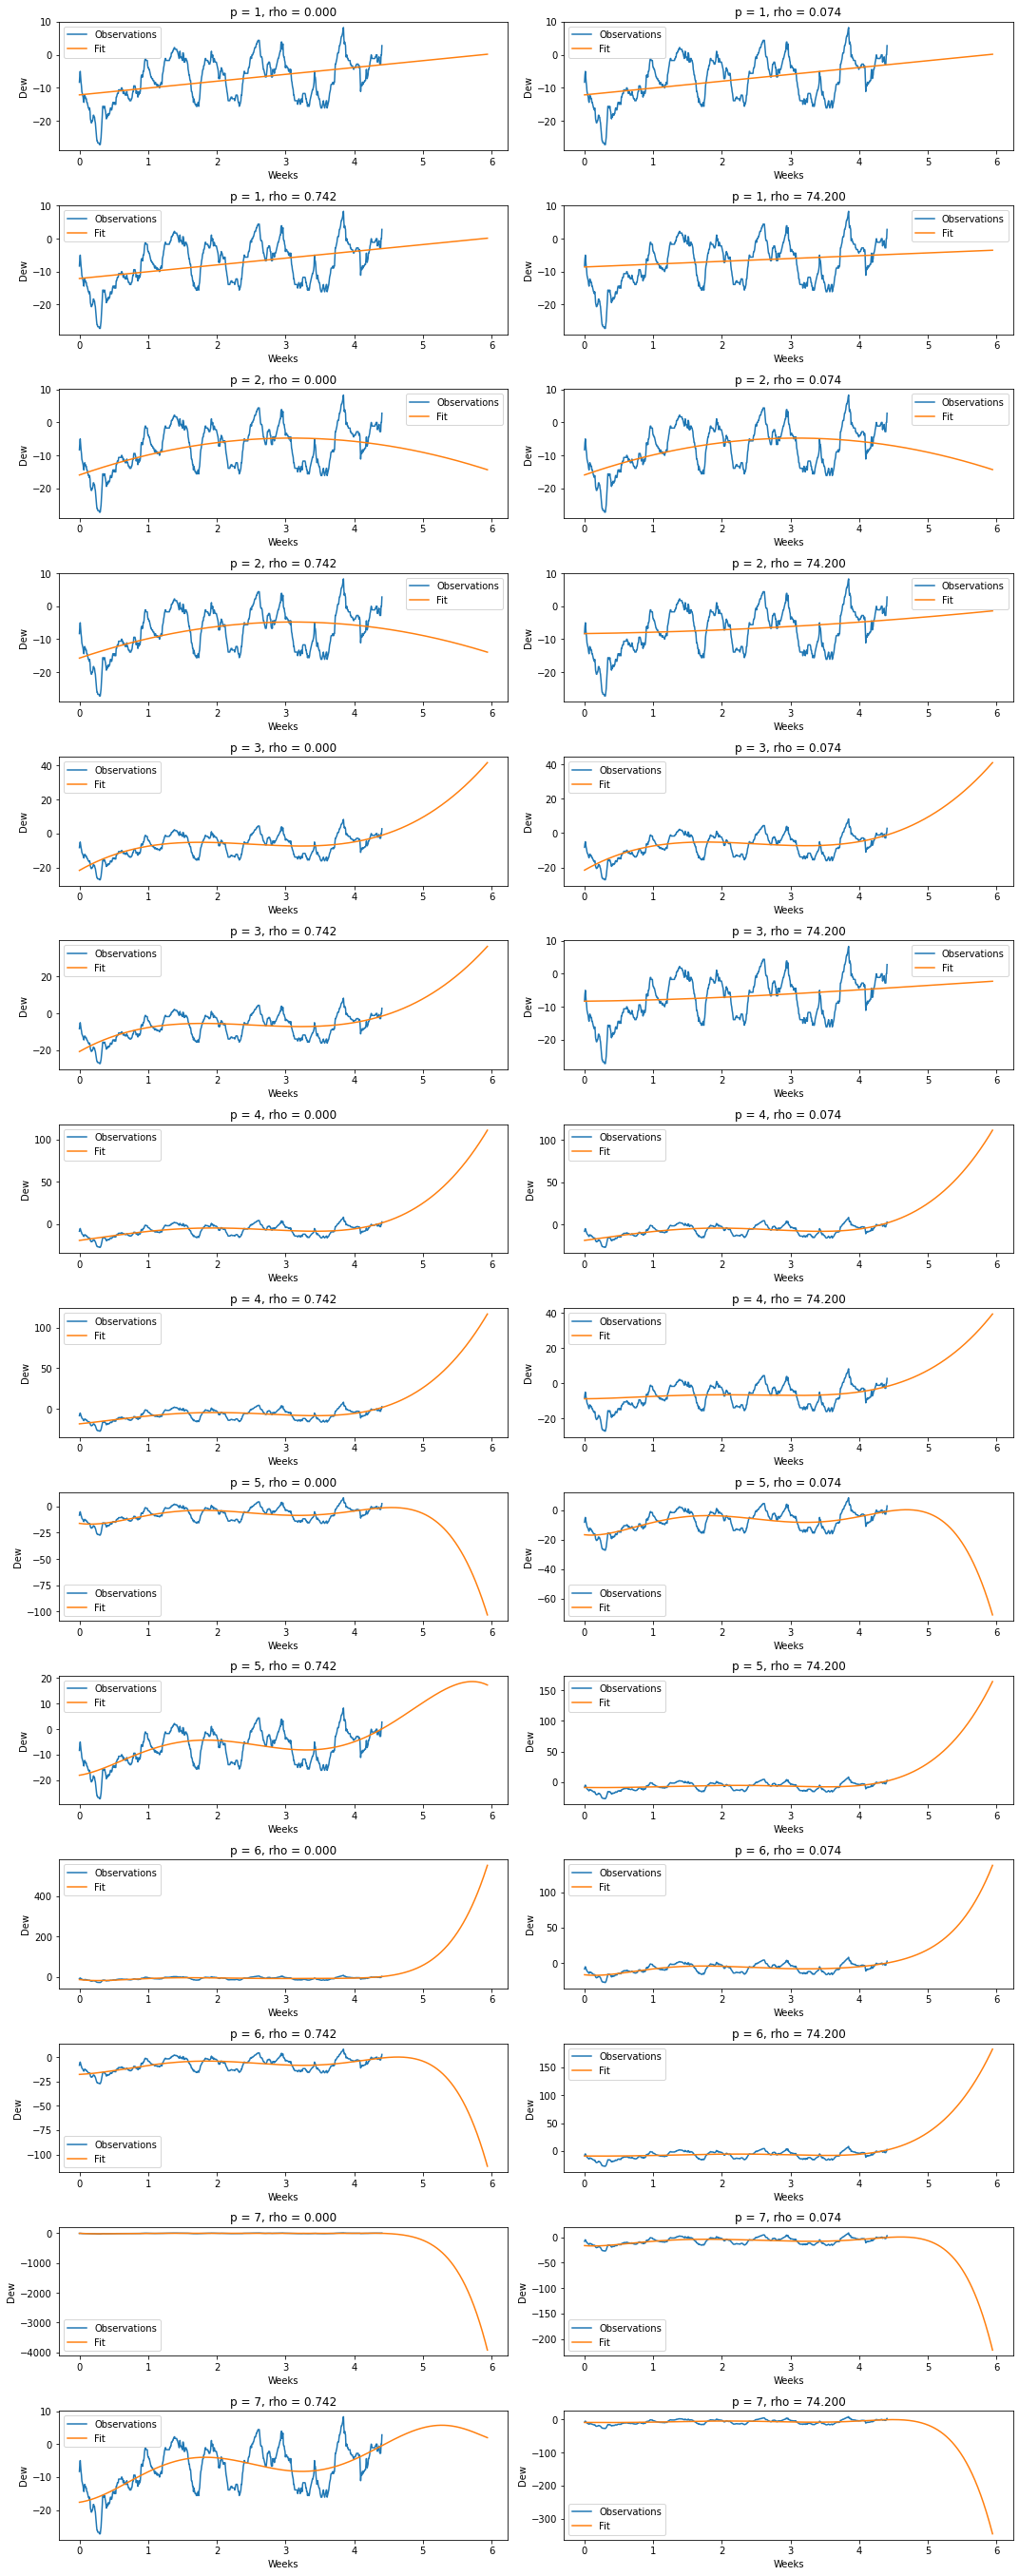

In [61]:
rhos = [0, 0.0001 * N, 0.001 * N, 0.1 * N]
counter = 0
plt.rcParams["figure.figsize"] = (15,40)

for poly_order in [1,2,3,4,5,6,7]:
    X = np.zeros((len(X_fut[:-1]),poly_order+1))
    for p in range(poly_order+1):
        X[:,p] = np.array(X_fut[:-1])**p
    y = np.array(dewtemp)[1:]
    for rho in rhos:
        theta = solveRidgeRegressionSystem(X[:len(y)], y, rho)
        ypred = np.dot(X, theta)
        #mse = np.sum((ypred-y)**2)/N
        counter += 1
        plt.subplot(15,2,counter)

        plt.plot(X_fut[:-1][:len(y)], y)
        plt.plot(X_fut[:-1][:len(ypred)], ypred) 

        plt.title('p = %d, rho = %.3f' % (poly_order, rho))

        plt.xlabel('Weeks')
        plt.ylabel('Dew')
        plt.legend(['Observations','Fit'])
    
plt.tight_layout()
plt.savefig('predictions_ridge_forecast_rho.png')

From above two searches for P and rho, plots are most stable for smaller values of rho (~0.001N) and p values 3,5.

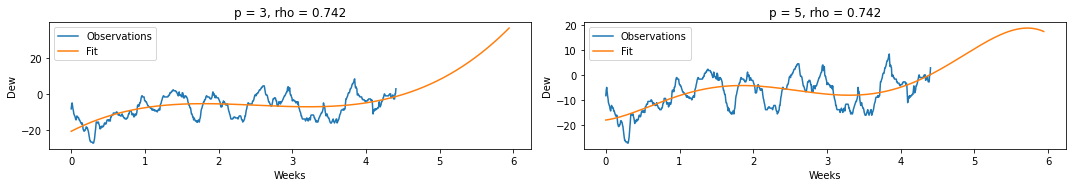

In [80]:
rhos = [0.001 * N]
counter = 0
plt.rcParams["figure.figsize"] = (15,35)

for poly_order in [3,5]:
    X = np.zeros((len(X_fut[:-1]),poly_order+1))
    for p in range(poly_order+1):
        X[:,p] = np.array(X_fut[:-1])**p
    y = np.array(dewtemp)[1:]
    for rho in rhos:
        theta = solveRidgeRegressionSystem(X[:len(y)], y, rho)
        ypred = np.dot(X, theta)
        #mse = np.sum((ypred-y)**2)/N
        counter += 1
        plt.subplot(15,2,counter)

        plt.plot(X_fut[:-1][:len(y)], y)
        plt.plot(X_fut[:-1][:len(ypred)], ypred) 

        plt.title('p = %d, rho = %.3f' % (poly_order, rho))

        plt.xlabel('Weeks')
        plt.ylabel('Dew')
        plt.legend(['Observations','Fit'])
    
plt.tight_layout()
plt.savefig('forecast.png')

Above predictions for (p,rho) = (3,0.001N) and (5,0.001N) looks reasonable as they seem most stable on the current observations. Trendline seems to indicate that dew point temperature should rise in next week.   